In [1]:
import os
import cv2
from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image 

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from yolo_model import YoloModel

In [3]:
my_model = YoloModel()

In [4]:
my_model.load_model()

In [5]:
image = Image.open('D:/Datasets/har/Prototype_01/ch04_20210413074231_79325.jpg')

In [6]:
numpy_image=np.array(image) 
preprocess_image=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
preprocess_image2=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

In [7]:
img, pos_img, non_pos_img, num_non_pos, num_pos  = my_model.predict(image)

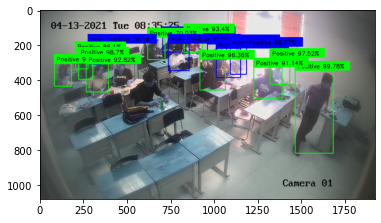

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)

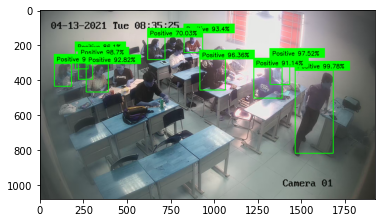

In [9]:
plt.imshow(pos_img)

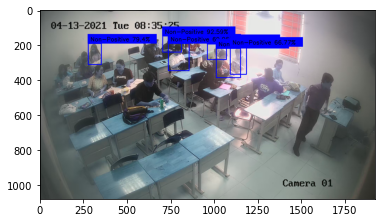

In [10]:
plt.imshow(non_pos_img)

In [17]:
num_non_pos

6

In [18]:
num_pos

10

In [11]:
infer_model = load_model('classroom.h5')
my_anchors = [16,37, 24,36, 24,52, 27,82, 31,153, 35,104, 36,68, 48,89, 49,198]
my_label = ["Positive", "Non-Positive"]
my_net_h = 416
my_net_w = 416
my_obj_thresh = 0.5 
my_nms_thresh = 0.45

In [12]:
type(infer_model)

tensorflow.python.keras.engine.functional.Functional

In [13]:
boxes = get_yolo_boxes(infer_model, [preprocess_image], my_net_h, my_net_w, my_anchors, my_obj_thresh, my_nms_thresh)[0]

In [14]:
# draw bounding boxes on the image using labels
draw_boxes(preprocess_image, boxes, my_label, my_obj_thresh) 

array([[[77, 82, 81],
        [78, 83, 82],
        [79, 84, 83],
        ...,
        [61, 63, 63],
        [61, 63, 63],
        [61, 63, 63]],

       [[78, 83, 82],
        [78, 83, 82],
        [79, 84, 83],
        ...,
        [61, 63, 63],
        [61, 63, 63],
        [61, 63, 63]],

       [[78, 83, 82],
        [78, 83, 82],
        [79, 84, 83],
        ...,
        [61, 63, 63],
        [61, 63, 63],
        [61, 63, 63]],

       ...,

       [[51, 56, 54],
        [51, 56, 54],
        [51, 56, 54],
        ...,
        [41, 41, 35],
        [41, 41, 35],
        [41, 41, 35]],

       [[51, 56, 54],
        [51, 56, 54],
        [51, 56, 54],
        ...,
        [41, 41, 35],
        [41, 41, 35],
        [41, 41, 35]],

       [[51, 56, 54],
        [51, 56, 54],
        [51, 56, 54],
        ...,
        [41, 41, 35],
        [41, 41, 35],
        [41, 41, 35]]], dtype=uint8)

In [15]:
result = 'Pos: ' + str(num_pos) + ' ' + 'Non-Pos: ' + str(num_non_pos)

In [16]:
x = image.width - 400

In [17]:
cv2.putText(preprocess_image, result, (x, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

array([[[77, 82, 81],
        [78, 83, 82],
        [79, 84, 83],
        ...,
        [61, 63, 63],
        [61, 63, 63],
        [61, 63, 63]],

       [[78, 83, 82],
        [78, 83, 82],
        [79, 84, 83],
        ...,
        [61, 63, 63],
        [61, 63, 63],
        [61, 63, 63]],

       [[78, 83, 82],
        [78, 83, 82],
        [79, 84, 83],
        ...,
        [61, 63, 63],
        [61, 63, 63],
        [61, 63, 63]],

       ...,

       [[51, 56, 54],
        [51, 56, 54],
        [51, 56, 54],
        ...,
        [41, 41, 35],
        [41, 41, 35],
        [41, 41, 35]],

       [[51, 56, 54],
        [51, 56, 54],
        [51, 56, 54],
        ...,
        [41, 41, 35],
        [41, 41, 35],
        [41, 41, 35]],

       [[51, 56, 54],
        [51, 56, 54],
        [51, 56, 54],
        ...,
        [41, 41, 35],
        [41, 41, 35],
        [41, 41, 35]]], dtype=uint8)

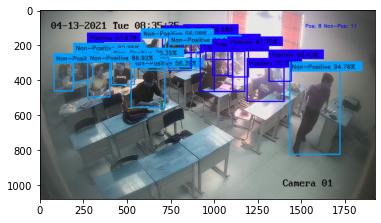

In [18]:
import matplotlib.pyplot as plt
plt.imshow(preprocess_image)